# NLP - Hotel review sentiment analysis in python

In [124]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')

## Data Facts and Import 

In [125]:
import pandas as pd 
Reviewdata = pd.read_csv(r'C:\Users\SHRIKANTH\Desktop\Datascience\NLP\Project\project_1\train.csv')

In [126]:
Reviewdata.shape

(38932, 5)

In [127]:
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [128]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


In [129]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id47717,1
Description,38932,38932,"Sketchy location, right off the highway, but d...",1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


## Data Cleaning / EDA

In [130]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


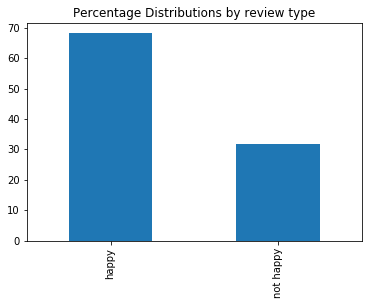

In [131]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [132]:
#Removing columns
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [133]:
import nltk
from nltk.corpus import stopwords
stop_words= stopwords.words('english')

In [134]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [135]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [136]:
import re
lemmatizer=WordNetLemmatizer()
for index,row in Reviewdata.iterrows():
    filter_sentence=[]
    sentence=row['Description']
    sentence = sentence.lower()
    sentence=re.sub(r'[^\w\s]','',sentence)
    words= nltk.word_tokenize(sentence)
    words= [w for w in words if not w in stop_words]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    #print(filter_sentence)
    Reviewdata.ix[index,'Description'] = filter_sentence

In [137]:
Reviewdata.head(5)

,Description,Is_Response
0,"[room, kind, clean, strong, smell, dog, genera...",not happy
1,"[stayed, crown, plaza, april, april, staff, fr...",not happy
2,"[booked, hotel, hotwire, lowest, price, could,...",not happy
3,"[stayed, husband, son, way, alaska, cruise, lo...",happy
4,"[girlfriend, stayed, celebrate, th, birthday, ...",not happy


In [138]:
Reviewdata['Description_string'] = [','.join(map(str, l)) for l in Reviewdata['Description']]
Reviewdata.head(5)

,Description,Is_Response,Description_string
0,"[room, kind, clean, strong, smell, dog, genera...",not happy,"room,kind,clean,strong,smell,dog,generally,ave..."
1,"[stayed, crown, plaza, april, april, staff, fr...",not happy,"stayed,crown,plaza,april,april,staff,friendly,..."
2,"[booked, hotel, hotwire, lowest, price, could,...",not happy,"booked,hotel,hotwire,lowest,price,could,find,g..."
3,"[stayed, husband, son, way, alaska, cruise, lo...",happy,"stayed,husband,son,way,alaska,cruise,loved,hot..."
4,"[girlfriend, stayed, celebrate, th, birthday, ...",not happy,"girlfriend,stayed,celebrate,th,birthday,planne..."


In [139]:
Reviewdata['Description_string']=Reviewdata['Description_string'].astype(str)

In [140]:
Reviewdata['Description_string'].astype('str')

0        room,kind,clean,strong,smell,dog,generally,ave...
1        stayed,crown,plaza,april,april,staff,friendly,...
2        booked,hotel,hotwire,lowest,price,could,find,g...
3        stayed,husband,son,way,alaska,cruise,loved,hot...
4        girlfriend,stayed,celebrate,th,birthday,planne...
                               ...                        
38927    arrived,late,night,walked,checkin,area,complet...
38928    positive,impression,location,public,parking,op...
38929    traveling,friend,shopping,show,location,great,...
38930    experience,ok,paid,extra,view,pool,got,view,pa...
38931    westin,wonderfully,restored,grande,dame,hotel,...
Name: Description_string, Length: 38932, dtype: object

In [141]:
Reviewdata['Description_string']=Reviewdata['Description_string'].str.replace(',',' ')

In [142]:
Reviewdata['Description_string'].head(5)

0    room kind clean strong smell dog generally ave...
1    stayed crown plaza april april staff friendly ...
2    booked hotel hotwire lowest price could find g...
3    stayed husband son way alaska cruise loved hot...
4    girlfriend stayed celebrate th birthday planne...
Name: Description_string, dtype: object

## Model training 

In [143]:
from sklearn.model_selection import train_test_split

x = Reviewdata.Description_string
y = Reviewdata.Is_Response

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 225)

print('x_train :', len(x_train))
print('x_test  :', len(x_test))
print('y_train :', len(y_train))
print('y_test  :', len(y_test))


x_train : 35038
x_test  : 3894
y_train : 35038
y_test  : 3894


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")





In [145]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(x_train, y_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)

confusion_matrix(predictions, y_test)

array([[2421,  316],
       [ 150, 1007]], dtype=int64)

## Model prediciton 

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, y_test, average = 'weighted'))


print("classification Report : ", classification_report(predictions, y_test))

Accuracy :  0.8803287108371854
Precision :  0.8880237119783635
Recall :  0.8803287108371854
classification Report :                precision    recall  f1-score   support

       happy       0.94      0.88      0.91      2737
   not happy       0.76      0.87      0.81      1157

    accuracy                           0.88      3894
   macro avg       0.85      0.88      0.86      3894
weighted avg       0.89      0.88      0.88      3894



## Trying on new reviews 

In [147]:
example = ["It was dirty"]
result = model.predict(example)

print(result)

['not happy']


In [148]:
example = ["I was satisfied"]
result = model.predict(example)

print(result)

['happy']


In [149]:
#Test data

In [150]:
Reviewdata_test = pd.read_csv(r'C:\Users\SHRIKANTH\Desktop\Datascience\NLP\Project\project_1\test.csv')

In [151]:
Reviewdata_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [152]:
#Removing columns
Reviewdata_test.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [153]:

lemmatizer=WordNetLemmatizer()
for index,row in Reviewdata_test.iterrows():
    filter_sentence=[]
    sentence=row['Description']
    sentence = sentence.lower()
    sentence=re.sub(r'[^\w\s]','',sentence)
    words= nltk.word_tokenize(sentence)
    words= [w for w in words if not w in stop_words]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    #print(filter_sentence)
    Reviewdata_test.ix[index,'Description'] = filter_sentence

In [154]:
Reviewdata_test['Description_string'] = [','.join(map(str, l)) for l in Reviewdata_test['Description']]
Reviewdata_test.head(5)

,Description,Description_string
0,"[looking, motel, close, proximity, tv, taping,...","looking,motel,close,proximity,tv,taping,dr,phi..."
1,"[walking, distance, madison, square, garden, p...","walking,distance,madison,square,garden,penn,su..."
2,"[visited, seattle, business, spent, night, vin...","visited,seattle,business,spent,night,vintage,p..."
3,"[hotel, location, excellent, room, clean, suit...","hotel,location,excellent,room,clean,suite,one,..."
4,"[hotel, awesome, love, service, anthony, reall...","hotel,awesome,love,service,anthony,really,grea..."


In [155]:
Reviewdata_test['Description_string'].astype('str')

0        looking,motel,close,proximity,tv,taping,dr,phi...
1        walking,distance,madison,square,garden,penn,su...
2        visited,seattle,business,spent,night,vintage,p...
3        hotel,location,excellent,room,clean,suite,one,...
4        hotel,awesome,love,service,anthony,really,grea...
                               ...                        
29399    stayed,hotel,tower,conference,loved,place,room...
29400    trying,stay,within,marriott,family,wanting,pay...
29401    stayed,night,little,dogvery,friendly,staff,ask...
29402    stayed,yotel,weekend,impressed,thing,liked,bes...
29403    blakely,comfortable,every,way,room,nicely,furn...
Name: Description_string, Length: 29404, dtype: object

In [156]:
Reviewdata_test['Description_string']=Reviewdata_test['Description_string'].str.replace(',',' ')

In [157]:
Reviewdata_test['Description_string'].head(5)

0    looking motel close proximity tv taping dr phi...
1    walking distance madison square garden penn su...
2    visited seattle business spent night vintage p...
3    hotel location excellent room clean suite one ...
4    hotel awesome love service anthony really grea...
Name: Description_string, dtype: object

In [158]:
Reviewdata_test['Description_string'].to_csv('Description_test')

In [159]:
result = model.predict(Reviewdata_test['Description_string'])

print(result)

['not happy' 'happy' 'happy' ... 'happy' 'happy' 'happy']


In [160]:
df= pd.DataFrame({'Description': Reviewdata_test.Description_string, 'Response': result})
df.head()

,Description,Response
0,looking motel close proximity tv taping dr phi...,not happy
1,walking distance madison square garden penn su...,happy
2,visited seattle business spent night vintage p...,happy
3,hotel location excellent room clean suite one ...,not happy
4,hotel awesome love service anthony really grea...,happy


#Trying on new reviews

In [161]:
example = ["room concierge service party scene great right middle downtown san diego restaurant club good definitely come back"]
result = model.predict(example)

print(result)

['happy']
